In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class HoughTransformDetector:
    def __init__(self, image_path):
        img = cv2.imread(image_path)
        if img is None:
            raise Exception("Помилка при завантаженні зображення")
        self.original = cv2.resize(img, (256, 256))
        
        # Створення копії для обробки
        self.image = self.original.copy()
        
        # Перетворення в градації сірого
        self.gray = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
        
        # Застосування фільтру Гауса для зменшення шуму
        self.blurred = cv2.GaussianBlur(self.gray, (5, 5), 0)
        
        # Виявлення країв за допомогою детектора Canny
        self.edges = cv2.Canny(self.blurred, 50, 150)

    def detect_lines(self):
        """Виявлення прямих ліній за допомогою класичного перетворення Хафа"""
        lines = cv2.HoughLines(self.edges, 1, np.pi/180, threshold=100)
        result = self.image.copy()
        
        if lines is not None:
            for rho, theta in lines[:, 0]:
                a = np.cos(theta)
                b = np.sin(theta)
                x0 = a * rho
                y0 = b * rho
                x1 = int(x0 + 1000*(-b))
                y1 = int(y0 + 1000*(a))
                x2 = int(x0 - 1000*(-b))
                y2 = int(y0 - 1000*(a))
                cv2.line(result, (x1, y1), (x2, y2), (0, 0, 255), 2)
                
        return result, lines

    def detect_lines_probabilistic(self):
        """Виявлення прямих ліній за допомогою імовірнісного перетворення Хафа"""
        lines = cv2.HoughLinesP(self.edges, 1, np.pi/180, threshold=50,
                               minLineLength=100, maxLineGap=10)
        result = self.image.copy()
        
        if lines is not None:
            for line in lines:
                x1, y1, x2, y2 = line[0]
                cv2.line(result, (x1, y1), (x2, y2), (255, 0, 0), 2)
                
        return result, lines

    def detect_circles(self):
        """Виявлення кіл за допомогою перетворення Хафа"""
        circles = cv2.HoughCircles(self.blurred, cv2.HOUGH_GRADIENT, dp=1, 
                                 minDist=50, param1=50, param2=30,
                                 minRadius=20, maxRadius=100)
        result = self.image.copy()
        
        if circles is not None:
            circles = np.uint16(np.around(circles))
            for i in circles[0, :]:
                # Зовнішнє коло
                cv2.circle(result, (i[0], i[1]), i[2], (0, 255, 0), 2)
                # Центр кола
                cv2.circle(result, (i[0], i[1]), 2, (0, 0, 255), 3)
                
        return result, circles

    def show_results(self):
        """Відображення результатів"""
        # Отримання результатів всіх методів
        lines_result, lines = self.detect_lines()
        prob_lines_result, prob_lines = self.detect_lines_probabilistic()
        circles_result, circles = self.detect_circles()
        
        # Створення підграфіків
        plt.figure(figsize=(20, 4))
        
        # Оригінальне зображення
        plt.subplot(151)
        plt.imshow(cv2.cvtColor(self.original, cv2.COLOR_BGR2RGB))
        plt.title('Оригінал')
        plt.axis('off')
        
        # Краї
        plt.subplot(152)
        plt.imshow(self.edges, cmap='gray')
        plt.title('Краї (Canny)')
        plt.axis('off')
        
        # Класичне перетворення Хафа
        plt.subplot(153)
        plt.imshow(cv2.cvtColor(lines_result, cv2.COLOR_BGR2RGB))
        plt.title('Класичне перетворення Хафа')
        plt.axis('off')
        
        # Імовірнісне перетворення Хафа
        plt.subplot(154)
        plt.imshow(cv2.cvtColor(prob_lines_result, cv2.COLOR_BGR2RGB))
        plt.title('Імовірнісне перетворення Хафа')
        plt.axis('off')
        
        # Виявлення кіл
        plt.subplot(155)
        plt.imshow(cv2.cvtColor(circles_result, cv2.COLOR_BGR2RGB))
        plt.title('Виявлення кіл')
        plt.axis('off')
        
        plt.tight_layout()
        plt.show()
        
        # Виведення масивів результатів
        print("\nРезультати класичного перетворення Хафа:")
        print(lines)
        print("\nРезультати імовірнісного перетворення Хафа:")
        print(prob_lines)
        print("\nРезультати виявлення кіл:")
        print(circles)

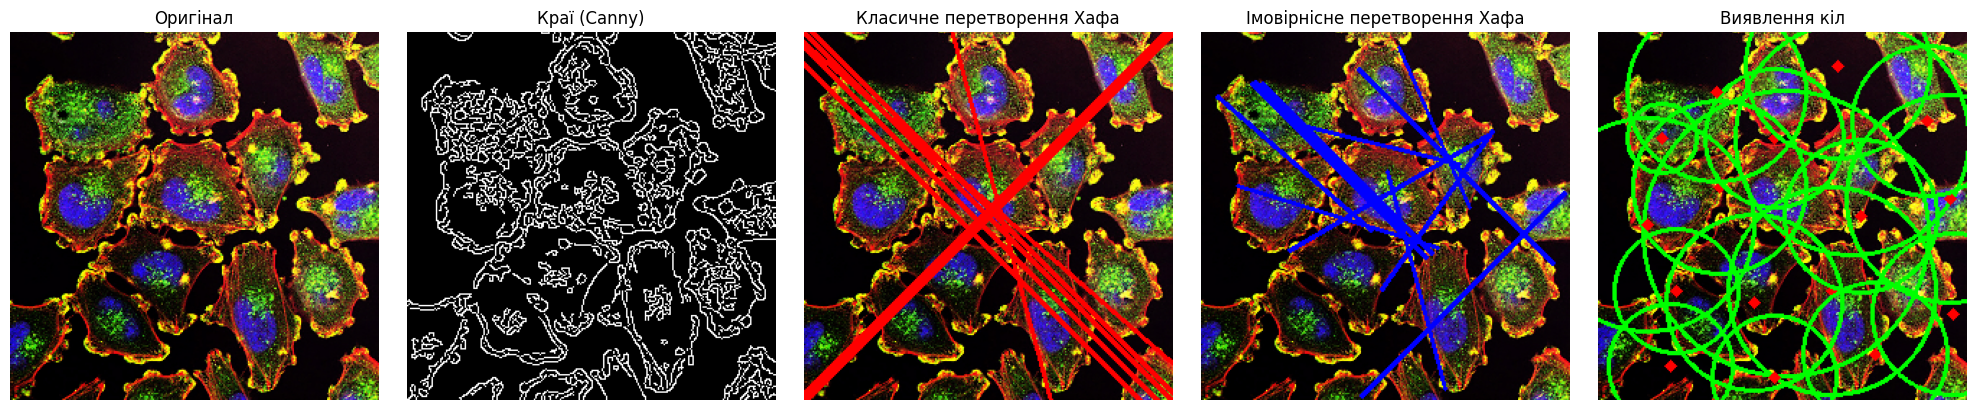


Результати класичного перетворення Хафа:
[[[180.          0.7853982]]

 [[  1.          2.3561945]]

 [[  8.          2.3561945]]

 [[182.          0.7853982]]

 [[ -4.          2.3561945]]

 [[ 16.          2.3561945]]

 [[  6.          2.2863812]]

 [[177.          0.7853982]]

 [[-99.          2.8797932]]]

Результати імовірнісного перетворення Хафа:
[[[ 42  36 160 154]]

 [[129  97 169 248]]

 [[125 179 202  69]]

 [[ 35  36 156 157]]

 [[ 37  35 137 135]]

 [[109  26 244 161]]

 [[ 11  45 118 138]]

 [[ 25 107 164 150]]

 [[137  11 186 122]]

 [[ 65  64 179  92]]

 [[111 253 252 112]]

 [[ 61 152 199  72]]]

Результати виявлення кіл:
[[[130 140  99]
  [ 84 108  60]
  [162 180  72]
  [176  74  81]
  [108 188  61]
  [182 128  53]
  [122  74  48]
  [ 82  42  62]
  [ 34 134  74]
  [166  24  64]
  [192 224  50]
  [244 116  72]
  [ 54 180  43]
  [122 240  43]
  [246 196  56]
  [228  62  52]
  [ 44  74  24]
  [ 50 232  43]]]


In [3]:
try:
    detector = HoughTransformDetector("sample.jpg")
    detector.show_results()
except Exception as e:
    print(f"error: {str(e)}")